In [2]:
import json
import requests # It is a popular HTTP library for HTTP requests in Python
import pandas as pd # It is a powerful, open-source data manipulation and analysis library for Python
from datetime import datetime # The datetime module supplies classes to work with date and time
import matplotlib.pyplot as plt # For Data visualisation
import seaborn as sns # For Data visualisation
import psycopg2 # For connecting to PstgreSQL databases and executing queries.
from sqlalchemy import create_engine # To efficiently manage and reuse database connections

In [3]:
url = f"https://api.open-meteo.com/v1/forecast?latitude=52.9536&longitude=-1.1505&daily=temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,daylight_duration,sunshine_duration,rain_sum,showers_sum,snowfall_sum,wind_speed_10m_max&timezone=Europe%2FLondon"

response = requests.get(url)

In [4]:
data = response.json()
json_str = json.dumps(data, indent=4)
print(json_str)

{
    "latitude": 52.96,
    "longitude": -1.1600001,
    "generationtime_ms": 0.2180337905883789,
    "utc_offset_seconds": 0,
    "timezone": "Europe/London",
    "timezone_abbreviation": "GMT",
    "elevation": 51.0,
    "daily_units": {
        "time": "iso8601",
        "temperature_2m_max": "\u00b0C",
        "temperature_2m_min": "\u00b0C",
        "apparent_temperature_max": "\u00b0C",
        "apparent_temperature_min": "\u00b0C",
        "daylight_duration": "s",
        "sunshine_duration": "s",
        "rain_sum": "mm",
        "showers_sum": "mm",
        "snowfall_sum": "cm",
        "wind_speed_10m_max": "km/h"
    },
    "daily": {
        "time": [
            "2023-12-20",
            "2023-12-21",
            "2023-12-22",
            "2023-12-23",
            "2023-12-24",
            "2023-12-25",
            "2023-12-26"
        ],
        "temperature_2m_max": [
            11.1,
            12.0,
            10.4,
            11.3,
            13.5,
            

In [19]:
# Python Program to Convert seconds
# into hours, minutes and seconds

def convert(seconds):
	min, sec = divmod(seconds, 60)
	hour, min = divmod(min, 60)
	return '%d:%02d:%02d' % (hour, min, sec)

In [20]:
data = response.json()
weather_data = []
count = 0
for day in data['daily']['time']:
    time = data['daily']['time'][count]
    temp_max = data['daily']['temperature_2m_max'][count]
    temp_min = data['daily']['temperature_2m_min'][count]
    daylight = data['daily']['daylight_duration'][count]
    daylight_hrs = convert(data['daily']['daylight_duration'][count])
    sunshine = data['daily']['sunshine_duration'][count]
    sunshine_hrs = convert(data['daily']['sunshine_duration'][count])
    rain_vol = data['daily']['rain_sum'][count]
    snowfall = data['daily']['snowfall_sum'][count]
    wind_speed = data['daily']['wind_speed_10m_max'][count]

        
    weather_data.append({
        "Date": time,
        "Max Temperature": temp_max,
        "Min Temperature": temp_min,
        "Daylight Duration (seconds)": daylight,
        "Daylight Duration (hours)": daylight_hrs,
        "Sunshine Duration (seconds)": sunshine,
        "Sunshine Duration (hours)": sunshine_hrs,
        "Rain Volumn (mm)": rain_vol,
        "Snowfall (cm)": snowfall,
        "Wind Speed": wind_speed    
        })
    count += 1
        
    df = pd.DataFrame(weather_data)
    
df.head(10)

,Date,Max Temperature,Min Temperature,Daylight Duration (seconds),Daylight Duration (hours),Sunshine Duration (seconds),Sunshine Duration (hours),Rain Volumn (mm),Snowfall (cm),Wind Speed
0,2023-12-20,11.1,6.4,27257.01,7:34:17,0.00,0:00:00,0.0,0.0,20.9
1,2023-12-21,12.0,9.0,27247.65,7:34:07,15127.71,4:12:07,0.0,0.0,27.9
2,2023-12-22,10.4,9.2,27245.57,7:34:05,0.00,0:00:00,1.1,0.0,26.2
3,2023-12-23,11.3,9.7,27250.88,7:34:10,3083.56,0:51:23,3.2,0.0,29.2
4,2023-12-24,13.5,10.7,27263.66,7:34:23,0.00,0:00:00,4.2,0.0,25.1
5,2023-12-25,12.5,6.2,27284.01,7:34:44,0.00,0:00:00,5.0,0.0,25.4
6,2023-12-26,6.9,5.3,27311.82,7:35:11,3890.83,1:04:50,4.7,0.0,20.6


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         7 non-null      object 
 1   Max Temperature              7 non-null      float64
 2   Min Temperature              7 non-null      float64
 3   Daylight Duration (seconds)  7 non-null      float64
 4   Daylight Duration (hours)    7 non-null      object 
 5   Sunshine Duration (seconds)  7 non-null      float64
 6   Sunshine Duration (hours)    7 non-null      object 
 7   Rain Volumn (mm)             7 non-null      float64
 8   Snowfall (cm)                7 non-null      float64
 9   Wind Speed                   7 non-null      float64
dtypes: float64(7), object(3)
memory usage: 692.0+ bytes


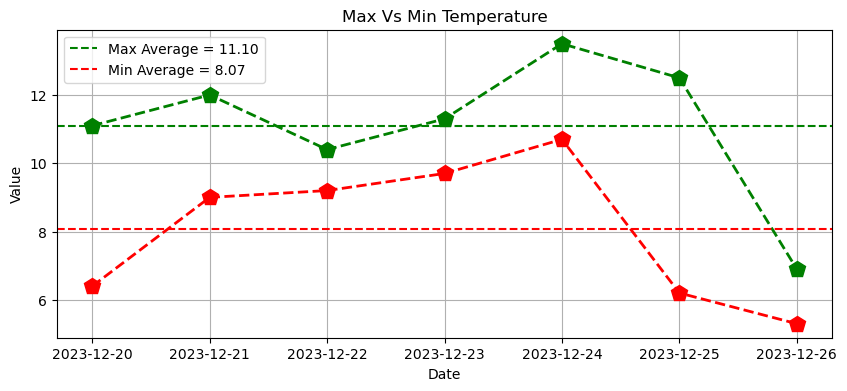

In [29]:

min_average_value = df['Min Temperature'].mean()
max_average_value = df['Max Temperature'].mean()

plt.figure(figsize=(10,4))
plt.plot(df['Date'], df['Min Temperature'], color='red', marker='p', linestyle='dashed', linewidth=2, markersize=12)
plt.plot(df['Date'], df['Max Temperature'], color='green', marker='p', linestyle='dashed', linewidth=2, markersize=12)
plt.axhline(y=max_average_value, color='g', linestyle='--', label=f'Max Average = {max_average_value:.2f}')
plt.axhline(y=min_average_value, color='r', linestyle='--', label=f'Min Average = {min_average_value:.2f}')
plt.title('Max Vs Min Temperature')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left') # Add a legend
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


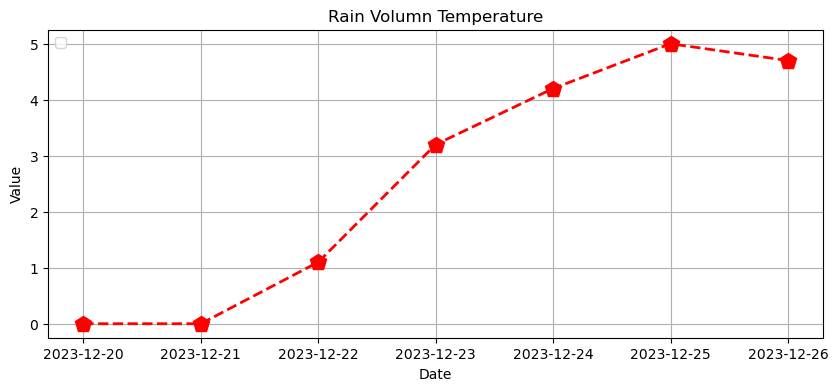

In [35]:
rain_value = df['Rain Volumn (mm)'].sum()

plt.figure(figsize=(10,4))
plt.plot(df['Date'], df['Rain Volumn (mm)'], color='red', marker='p', linestyle='dashed', linewidth=2, markersize=12)
# plt.axhline(y=rain_value, color='g', linestyle='--', label=f'Max Average = {rain_value:.2f}')
plt.title('Rain Volumn Temperature')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left') # Add a legend
plt.grid(True)
plt.show()

In [24]:
# Database Credentials
from sqlalchemy import create_engine
import os
import psycopg2

# Database Credentials
username = os.environ['USER']
password = os.environ['PASS']
host = 'localhost'
port = 5433
db_name = 'Weather_Data'

In [25]:
# Establish a connection
engine = create_engine(f'postgresql://{username}:{password}@{host}:{port}/{db_name}')

In [27]:
#Load the database table - employee_table

df.to_sql('weather_data', engine, if_exists='replace', index=False)

# Close the connection
engine.dispose()